<a href="https://colab.research.google.com/github/VatsalyaDubey16/Classification/blob/main/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with multiclass classification

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
train_data[0].ndim, train_labels[0].ndim

(2, 0)

In [7]:
train_data.ndim, train_labels.ndim

(3, 1)

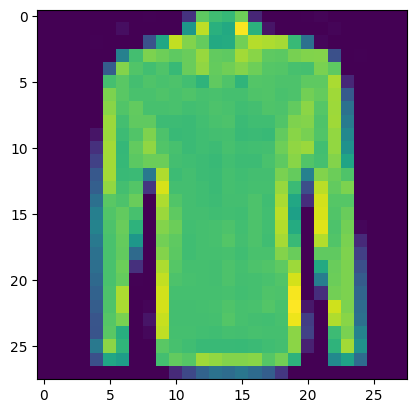

In [8]:
# Plot a single example
plt.imshow(train_data[40]);

In [9]:
# Check out samples label
train_labels[40]

6

In [10]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'Shirt')

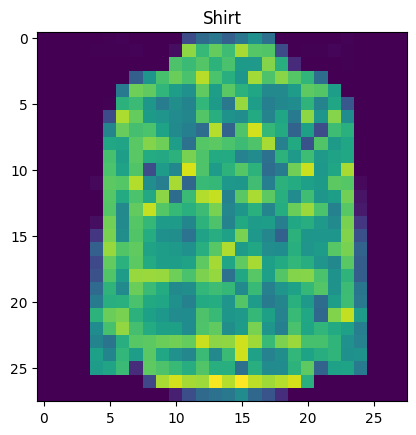

In [11]:
show_this = 32
plt.imshow(train_data[show_this])
plt.title(class_names[train_labels[show_this]])

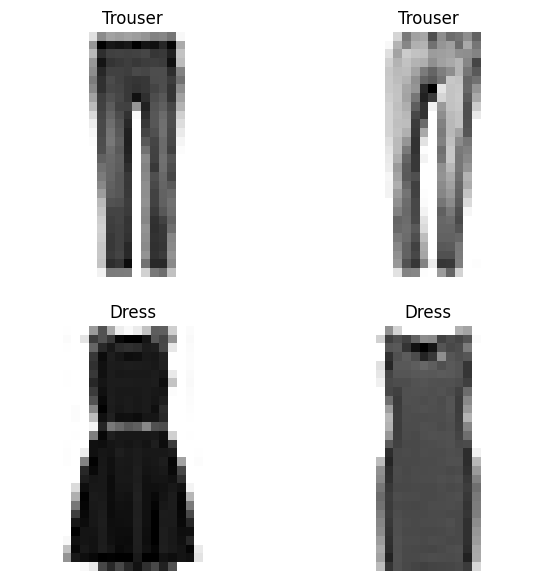

In [12]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Model_1:

In [18]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

# Fit the model
history_1 = model_1.fit(train_data,
                        train_labels,
                        epochs =10,
                        validation_data = (test_data, test_labels),
                        batch_size = 2000)

Epoch 1/10
30/30 [==============================] - 1s 9ms/step - loss: 12.6006 - accuracy: 0.0762 - val_loss: 2.3128 - val_accuracy: 0.1000
Epoch 2/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3115 - accuracy: 0.1000 - val_loss: 2.3058 - val_accuracy: 0.1000
Epoch 3/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3086 - accuracy: 0.1000 - val_loss: 2.3051 - val_accuracy: 0.1000
Epoch 4/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3077 - accuracy: 0.0987 - val_loss: 2.3047 - val_accuracy: 0.1001
Epoch 5/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3071 - accuracy: 0.0989 - val_loss: 2.3042 - val_accuracy: 0.1000
Epoch 6/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3066 - accuracy: 0.0987 - val_loss: 2.3040 - val_accuracy: 0.1000
Epoch 7/10
30/30 [==============================] - 0s 5ms/step - loss: 2.3061 - accuracy: 0.0992 - val_loss: 2.3037 - val_accuracy: 0.1000
Epoch 8/10
30/30 [=

In [19]:
model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 4)                 3140      
                                                                 
 dense_16 (Dense)            (None, 4)                 20        
                                                                 
 dense_17 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [22]:
# Normilization
train_data = train_data/255.
test_data = test_data/255.

train_data.min(), train_data.max()

(0.0, 1.0)

In [74]:
from tensorflow.keras.callbacks import LearningRateScheduler
# Set random seed
tf.random.set_seed(42)

# Define a learning rate schedule function

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Define the learning rate scheduler callback
#lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Compile the model
model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics = ['accuracy'])

# Fit the model
history_2 = model_2.fit(train_data,
                        train_labels,
                        epochs =10,
                        validation_data = (test_data, test_labels),
                        batch_size = 200
                        )

Epoch 1/10
300/300 [==============================] - 3s 5ms/step - loss: 0.5825 - accuracy: 0.7987 - val_loss: 0.4590 - val_accuracy: 0.8398
Epoch 2/10
300/300 [==============================] - 1s 3ms/step - loss: 0.4072 - accuracy: 0.8555 - val_loss: 0.4139 - val_accuracy: 0.8507
Epoch 3/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3633 - accuracy: 0.8683 - val_loss: 0.3850 - val_accuracy: 0.8636
Epoch 4/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8789 - val_loss: 0.3692 - val_accuracy: 0.8646
Epoch 5/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3157 - accuracy: 0.8850 - val_loss: 0.3728 - val_accuracy: 0.8657
Epoch 6/10
300/300 [==============================] - 1s 3ms/step - loss: 0.3029 - accuracy: 0.8881 - val_loss: 0.3550 - val_accuracy: 0.8716
Epoch 7/10
300/300 [==============================] - 1s 3ms/step - loss: 0.2878 - accuracy: 0.8944 - val_loss: 0.3378 - val_accuracy: 0.8778
Epoch 

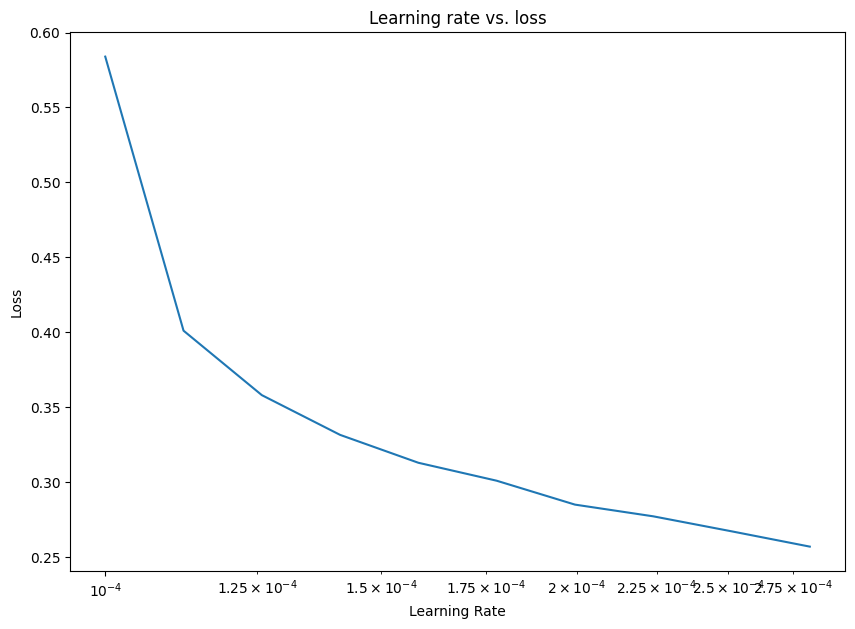

In [71]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs. loss");


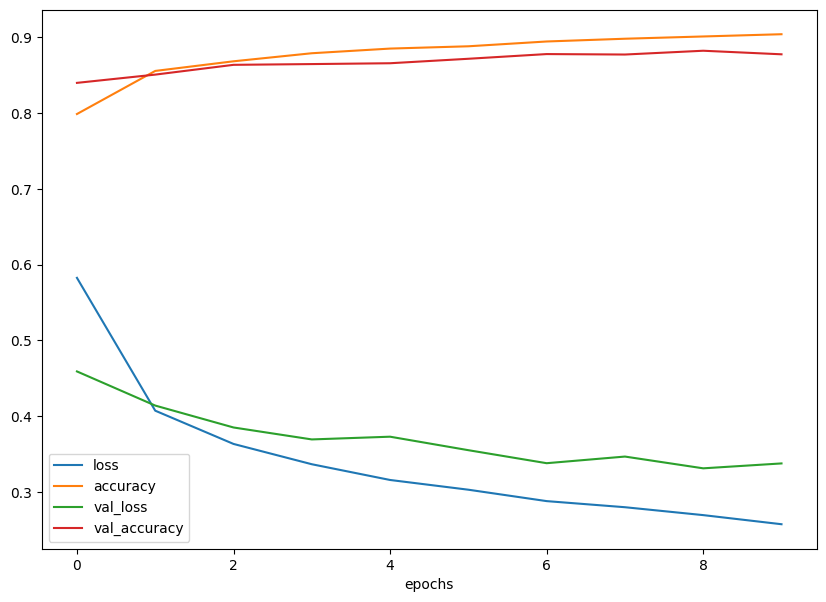

In [75]:
# Checkout the history
pd.DataFrame(history_2.history).plot(figsize=(10,7), xlabel="epochs");

In [76]:
# Check the accuracy of our model
loss, accuracy = model_2.evaluate(test_data, test_labels)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.3375 - accuracy: 0.8775
Model loss on test set: 0.3375464081764221
Model accuracy on test set: 87.75%


In [78]:
y_probs =  model_2.predict(test_data)

# View the first 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.35424461e-05, 5.32943396e-08, 7.97234236e-07, 7.99492511e-07,
        8.80763837e-05, 1.89584829e-02, 1.22184665e-05, 2.23423690e-02,
        5.67230672e-05, 9.58526969e-01],
       [3.20211839e-04, 1.45002774e-10, 9.89058793e-01, 1.15240075e-08,
        2.44196295e-03, 2.64056962e-12, 8.17902852e-03, 1.75857498e-13,
        3.58492294e-08, 2.20798518e-14],
       [1.20701088e-06, 9.99998689e-01, 9.05725344e-08, 7.01767107e-08,
        1.23220767e-08, 1.73017698e-12, 8.83925733e-09, 1.16424979e-12,
        7.51043783e-10, 8.19328935e-16],
       [1.09754058e-06, 9.99994397e-01, 2.58990582e-07, 4.07971766e-06,
        1.58176348e-07, 1.34335557e-10, 1.33887212e-07, 1.54974741e-10,
        1.56921898e-09, 9.61262970e-13],
       [9.20462683e-02, 2.14544048e-06, 1.18914014e-02, 2.33325339e-03,
        7.57476268e-03, 5.68885064e-08, 8.85912299e-01, 7.47542899e-08,
        2.39172805e-04, 5.88652881e-07]], dtype=float32)

Our model outputs a list of prediction probabilities, meaning, it outputs a number for how likely it thinks a paricular class is to be the label.
The higher the number in the prediction probabilities list, the more likely the modle believes that is the right class.
To find the highest value we can use the `argmax()` method.

In [80]:
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, '\tAnkle boot')

In [81]:
# Convert all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis =1)

y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

array([[887,   1,  11,   7,   5,   0,  84,   0,   5,   0],
       [  4, 974,   0,  13,   4,   0,   5,   0,   0,   0],
       [ 20,   2, 701,   4, 151,   0, 120,   0,   2,   0],
       [ 53,  17,  11, 829,  47,   0,  39,   0,   4,   0],
       [  0,   1,  52,  19, 845,   0,  83,   0,   0,   0],
       [  0,   0,   0,   0,   0, 970,   0,  17,   1,  12],
       [146,   3,  54,  18,  66,   0, 709,   0,   4,   0],
       [  0,   0,   0,   0,   0,  24,   0, 950,   0,  26],
       [ 11,   0,   2,   3,   7,   4,  10,   3, 960,   0],
       [  0,   0,   0,   0,   0,  16,   1,  33,   0, 950]])

In [83]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


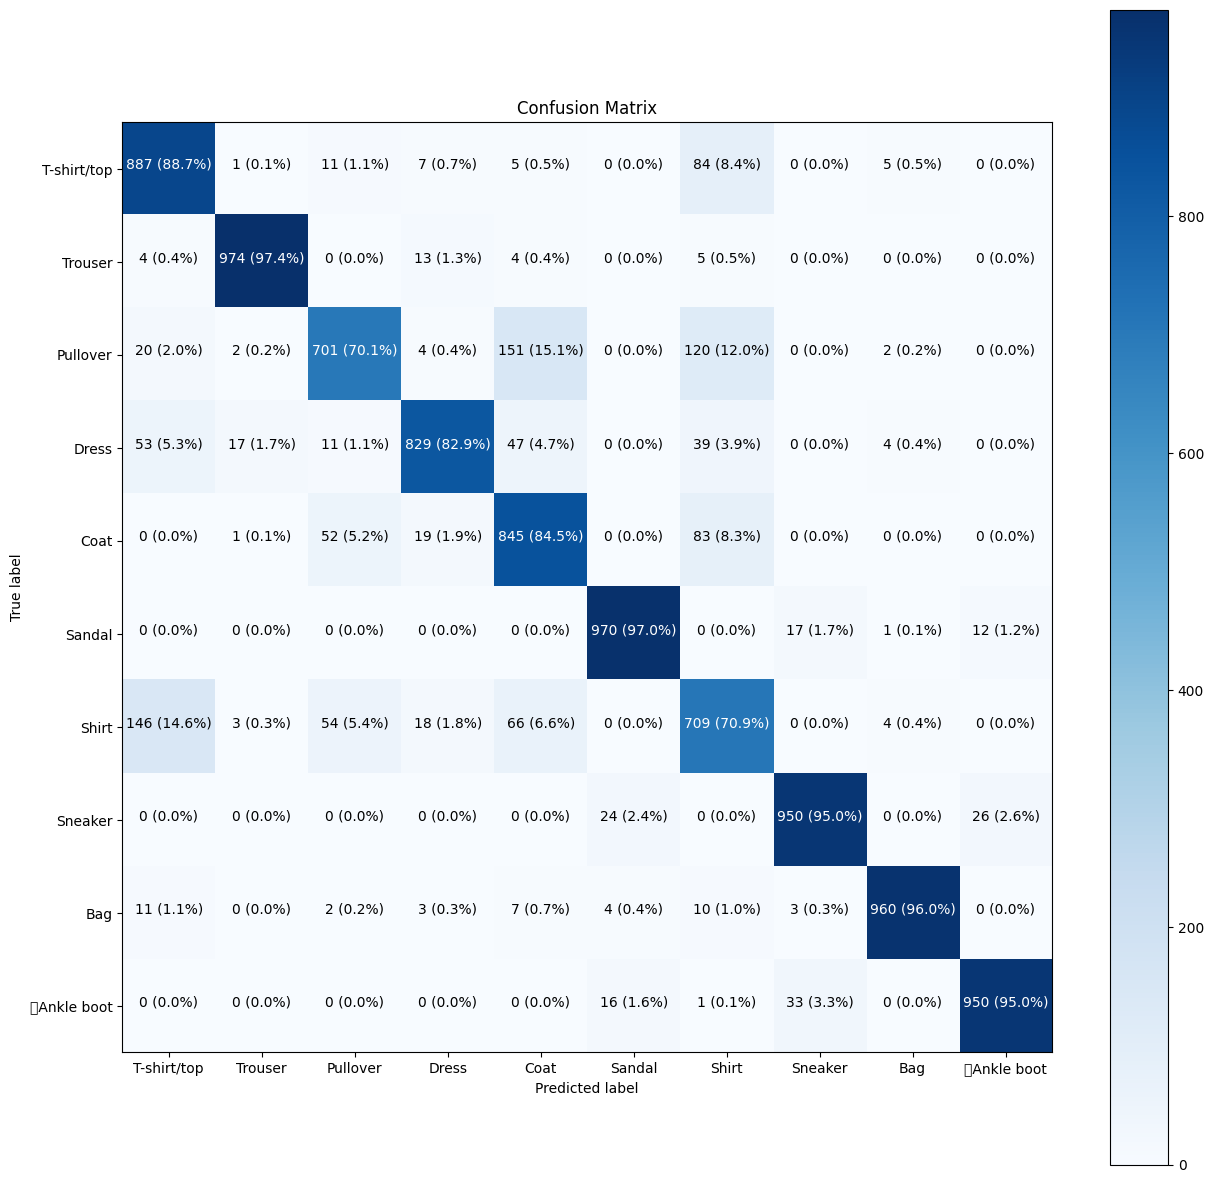

In [84]:
# Make a prettier confusion matrix
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_preds,
                      classes=class_names,
                      figsize=(15, 15),
                      text_size=10)